### Feature Engineering

In [1]:
# Check missing values
import seaborn as sns

In [2]:
df=sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull().sum()  # This shows the total no of missing values in every column

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# 1) Drop the entire row which is having a null value 
df.shape

(891, 15)

In [6]:
# The disavantage of this method is we have to lose a large no of datasets (not a good practice)
df.dropna().shape   # only 182 rows left

(182, 15)

In [7]:
# we can also drop the column having null values 
df.dropna(axis=1).shape  # 4 columns removed 

(891, 11)

### Imputation missing values

#### 1) Mean Value Imputation

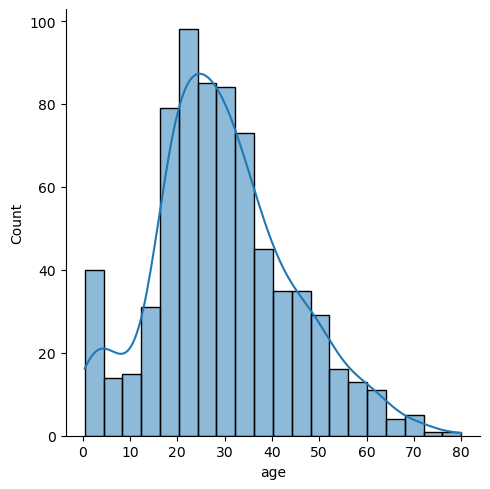

In [8]:
sns.displot(df['age'],kde=True)

In [9]:
df['age_mean']=df['age'].fillna(df['age'].mean())   # mean is a function write properly

In [10]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [11]:
# We know the mean computation works well with normal distributed data
# But it there is left or right skewed data distribution ( a lot of outlier is there) then using the median computation

#### 2) Median value imputation  (Use when we have outiers in the datasets)

In [12]:
df['age_median']=df['age'].fillna(df['age'].median())

In [13]:
df[['age_median','age_mean','age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


#### 3) Mode-computation technique (uses with categorical values)

In [14]:
df[df['embarked'].isnull()]  # It return the datasets containing embarked null value 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [15]:
df['embarked'].unique()   # Embarked is a catorical values

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
mode_val=df[df['embarked'].notnull()]['embarked'].mode()[0]

In [17]:
df['embarked_mode']=df['embarked'].fillna(mode_val)

In [18]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [19]:
df['embarked_mode'].isnull().sum()  # new embarked contains no missing value 

0

In [20]:
df['embarked'].isnull().sum()  # Previous embarked contains 2 missing value 

2

#### One more method: Random sample imputation
Take any value and then place it on the missing value and everytime it gets changed

### Handling Imbalanced datasets
1) upsampling 
2) downsampling 

In [21]:
import numpy as np
import pandas as pd
# set the random seed for reproducibility
np.random.seed(123)   # Whenever we are selecting some random values then it should not change 
# Create a dataframe with 2 classes
n_sample=1000
class_0_ratio=0.9
n_class_0=int(n_sample * class_0_ratio)    # 1000 * 0.9 = 900
n_class_1=n_sample - n_class_0   # remaining 1000 - 900 = 100

In [22]:
n_class_0,n_class_1

(900, 100)

In [23]:
# Create my dataframe with imbalanced datasets
class_0=pd.DataFrame({
    "feature1":np.random.normal(loc=0,scale=1,size=n_class_0),  #Normal distribution with mean 0 and total 900 datasets
    "feature2":np.random.normal(loc=0,scale=1,size=n_class_0),  #Normal distribution with mean 0 and total 900 datasets
    "target":[0]*n_class_0   # 900 zeroes will be created in this class
})

class_1=pd.DataFrame({
    "feature1":np.random.normal(loc=2,scale=1,size=n_class_1),  #Normal distribution with mean 2 and total 100 datasets
    "feature2":np.random.normal(loc=2,scale=1,size=n_class_1),  #Normal distribution with mean 2 and total 100 datasets
    "target":[1]*n_class_1   # 100 ones will be created in this class
})

In [24]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [25]:
df.head()

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [26]:
df.tail()

,feature1,feature2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [27]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [28]:
## Upsampling : Increase the minority value to 900
df_minority=df[df['target']==1]  # Gives all the rows that has 1 value
df_majority=df[df['target']==0]  # Gives all the rows that has 0 value

In [32]:
# resampling : It extrapolate the datapoints 
# ( This will create more points in the minority and try to make it equal tot he majority ) 
from sklearn.utils import resample
df_minor_upsample=resample(df_minority,     # minor_data
                           replace=True,    # different data get added to main data
                           n_samples=len(df_majority),   # total no of value to upsample
                           random_state=42  # random data(so seed can be fixed here)
                          )

In [33]:
df_minor_upsample.shape   # Now minority data is become equal to the majority data

(900, 3)

In [34]:
df_minor_upsample   # The target is 1 for every data 

,feature1,feature2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1
...,...,...,...
952,1.188902,2.189189,1
965,3.919526,1.980541,1
976,2.810326,3.604614,1
942,3.621531,2.168229,1


In [37]:
df_upsample=pd.concat([df_majority,df_minor_upsample])

In [39]:
df_upsample['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

In [ ]:
# Downsampling 

In [40]:
# follow same previous procedure
import numpy as np
import pandas as pd
# set the random seed for reproducibility
np.random.seed(123)   # Whenever we are selecting some random values then it should not change 
# Create a dataframe with 2 classes
n_sample=1000
class_0_ratio=0.9
n_class_0=int(n_sample * class_0_ratio)    # 1000 * 0.9 = 900
n_class_1=n_sample - n_class_0   # remaining 1000 - 900 = 100

In [41]:
n_class_0,n_class_1

(900, 100)

In [42]:
# Create my dataframe with imbalanced datasets
class_0=pd.DataFrame({
    "feature1":np.random.normal(loc=0,scale=1,size=n_class_0),  #Normal distribution with mean 0 and total 900 datasets
    "feature2":np.random.normal(loc=0,scale=1,size=n_class_0),  #Normal distribution with mean 0 and total 900 datasets
    "target":[0]*n_class_0   # 900 zeroes will be created in this class
})

class_1=pd.DataFrame({
    "feature1":np.random.normal(loc=2,scale=1,size=n_class_1),  #Normal distribution with mean 2 and total 100 datasets
    "feature2":np.random.normal(loc=2,scale=1,size=n_class_1),  #Normal distribution with mean 2 and total 100 datasets
    "target":[1]*n_class_1   # 100 ones will be created in this class
})

In [43]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [44]:
df.head()

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [45]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [46]:
## Downsampling : decrease the majority value to 100
df_minority=df[df['target']==1]  # Gives all the rows that has 1 value
df_majority=df[df['target']==0]  # Gives all the rows that has 0 value

In [47]:
# resampling : It extrapolate the datapoints 
# ( This will now reduce points in the majority and try to make it equal tot he minority ) 
from sklearn.utils import resample
df_major_downsample=resample(df_majority,     # miajor_data
                           replace=False,    # data get removed from the main data
                           n_samples=len(df_minority),   # till no of value to downsample
                           random_state=42  # random data(so seed can be fixed here)
                          )

In [48]:
df_major_downsample.shape   # majority dataset become equal to the minority dataset 

(100, 3)

In [50]:
df_downsample=pd.concat([df_major_downsample,df_minority])

In [54]:
df_downsample['target'].value_counts()   # Downsampling is bad as we are losing our datasets

0    100
1    100
Name: target, dtype: int64